Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from optlang import Model, Variable, Constraint, Objective

In [2]:
from plot_opt import region_plot, plot_LP

# Programación lineal (Linear Programming y Mixed Integer Linear Programming)

## Programación lineal

### Definición

Un **problema de optimización** consiste en encontrar el punto $(x_1,\dots,x_n)$ de $\mathbb{R}^n$ para el que una **función objetivo** $f(x_1,\dots,x_n)$ alcanza su máximo absoluto, pero cumpliendo ciertas **restricciones**, que pueden ser igualdades $g_1(x_1,\dots,x_n)=c_1$ o desigualdades $g_2(x_1,\dots,x_n)<=c_2$.

Un **problema de programación lineal** es un **problema de optimización** en el que tanto la **función objetivo** como las **restricciones** son todas **funciones lineales**.

Por ejemplo
$$
\begin{split}
\text{Max: } & x + y \\
 \text{Such that: } & x + 2y \leq 4\\
 \text{} & 5x - y \leq 8\\
 \text{} & x,y \geq 0
\end{split}
$$


### Región factible

Las restricciones delimitan el conjunto de soluciones aceptables, que se denomina **región factible**. Al apilar inecuaciones, tomamos la intersección de varios semiplanos, que delimitan una región del espacio $\mathbb{R}^n$.

0 <= x 0 <= y


/home/pang/p/Curro/upm/optimizacion_y_estadistica/optimizacion-y-estadistica/cuadernos/MILP/plot_opt.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(X,Y,Z, [], colors='b')


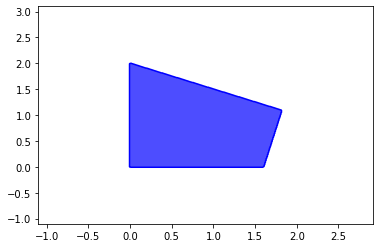

In [3]:
x = Variable('x',lb=0)
y = Variable('y',lb=0)
constraints = [
    Constraint(x+2*y, ub=4),
    Constraint(5*x-y, ub=8)
]
region_plot(constraints)

### Plantear el problema de optimización con restricciones

In [4]:
obj = Objective(x+y, direction='max')

In [5]:
model = Model(name='My model')
model.objective = obj
model.add(constraints)

status = model.optimize()

print("status:", model.status)
print("objective value:", model.objective.value)

status: optimal
objective value: 2.9090909090909087


In [6]:
for var_name, var in model.variables.items():
    print(var_name, "=", var.primal)

x = 1.818181818181818
y = 1.0909090909090908


### Dibujamos el resultado

Dibujamos la región factible en azul, la solución óptima en rojo, y dibujamos en verde el conjunto de puntos de todo el plano donde la función objetivo toma el valor óptimo. Observamos que sólo hay un punto con el valor óptimo dentro de la región factible.

0 <= x 0 <= y


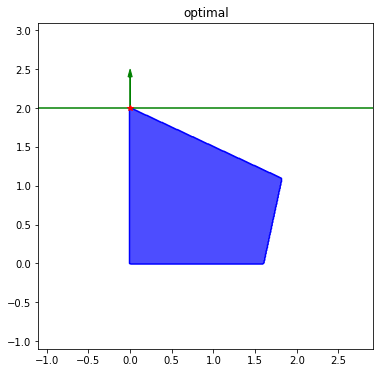

In [7]:
plt.figure(figsize=(6,6))
plot_LP(model)

## Teoría básica

> Una región factible definida por una cantidad finita de restricciones siempre es un poliedro (en general, un poliedro irregular en $\mathbb{R}^d$, que puede estar acotado o no).
> - La cantidad de vértices del poliedro es finita.

> Si en un problema LP la región es acotada, cualquier problema de optimización de una función lineal tendrá una o más soluciones óptimas.
> - El conjunto de soluciones óptimas es una cara del poliedro que es la región factible.
> - Al menos un vértice es solución óptima.


## Clasificación de problemas LP

Un problema LP puede ser de uno de los siguientes tipos:

 - Inviable: la región factible es vacía (ninguna estrategia satisface todas las restricciones).
 - Solución única: el valor óptimo de la función objetivo se obtiene en un único punto de la región factible. Atención: la región factible puede ser no acotada, pero que aún así haya solución única.
 - Solución múltiple: el valor óptimo de la función objetivo se obtiene en al menos dos puntos de la región factible. Eso sí, en problemas LP, si el óptimo se alcanza en dos puntos, se alcanzará también en el segmento que los une, luego habrá infinitas soluciones. Atención: la región factible puede ser no acotada, pero que aún así haya solución múltiple, pero con un valor óptimo finito.
 - Problema no acotado: la región factible no está acotada, y además es posible moverse dentro de la región factible de modo que el valor de la función objetivo crezca sin límite (para un problema de maximización) o que decrezca sin límite (para un problema de minimización).

### Ejercicio 1

Repite el ejemplo del principio de la clase, pero añadiendo nuevas restricciones. Por ejemplo, añade:

$$
\begin{split}
\text{Max: } & x + y \\
 \text{Such that: } & x + 2y \leq 4\\
  & 5x - y \leq 8\\
  & y \leq 1.5\\
  & x,y \geq 0
\end{split}
$$

o 

$$
\begin{split}
\text{Max: } & x + y \\
 \text{Such that: } & x + 2y \leq 4\\
  & 5x - y \leq 8\\
  & x \leq 1.5\\
  & x,y \geq 0
\end{split}
$$

Dibuja el resultado final e interpreta la solución.

### Ejercicio 2

Repite el ejemplo del principio de la clase, con la misma región factible, pero con la función objetivo $x+2y-2$. Dibuja el resultado final:

$$
\begin{split}
\text{Max: } & x + 2y -2 \\
 \text{Such that: } & x + 2y \leq 4\\
 \text{} & 5x - y \leq 8\\
 \text{} & x,y \geq 0
\end{split}
$$


#### Segundo apartado del ejercicio 2
- Responded a la pregunta: ¿Hay una solución óptima al problema, o hay más de una? 
- Describid el conjunto de todas los puntos de la región factible donde se alcanza el valor óptimo con la mayor precisión posible. Una persona que no haya visto el dibujo debería ser capaz de dibujar el conjunto de forma exacta.

### Ejercicio 3

Resuelve el problema

$$
\begin{split}
\text{Max: } & x + y\\
 \text{Such that: } & x - 3y \leq 4\\
  & 5x - y \geq 8\\
  & x,y \geq 0
\end{split}
$$

Interpreta la solución.

### Ejercicio 4
Plantea un MILP con un conjunto de restricciones **inviables** que definen el conjunto vacío: ningún punto del plano las verifica. ¿Cómo responde el software al plantear el problema, y al resolverlo?

### Ejercicio 5

Modeliza y resuelve el ejemplo del transporte de carbón de la wikipedia:

- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal#Ejemplo

## Hoja de ejercicios

Puedes empezar a hacer ejercicios de la hoja, hasta el número 6 inclusive.

Si no pudiste venir a clase o te cuesta plantear problemas de enunciado, puedes seguir vídeos como los de este canal:

 - https://www.youtube.com/results?search_query=david+calle+programacion+lineal

## Glosario en inglés

- **problema de optimización**: *optimization problem*
- **función objetivo**: *objective function*
- **restricciones**: *constraints*
- **problema de programación lineal**: *linear programming problem*
- **función lineal**: *linear function*
- **región convexa**: *convex region*
- **región factible**: *feasible region*
- **región acotada**: *bounded region*

## Para aprender más

- [Programación lineal en Wikipedia](https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal)
- [Linear programming in Wikipedia](https://en.wikipedia.org/wiki/Linear_programming) (un poco más completo).
- [Linear programming in Sage](http://doc.sagemath.org/html/en/thematic_tutorials/linear_programming.html)